In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D, Conv1D
from tensorflow.keras.models import Model

In [2]:
tweets = pd.read_csv('Depression_sentiment.csv', encoding='latin-1')
tweets.head(10)

,message,label
0,RT @prideinharry: please share these to your t...,0
1,RT @mxmtoon: are there really people without d...,0
2,RT @orisbusiness: Someone on your TL might nee...,0
3,RT @gperry1000: This week my dad lost his batt...,0
4,RT @orisbusiness: Someone on your TL might nee...,0
5,RT @tyler_casper: 45 Heartbreaking Photos Of T...,0
6,RT @celineakosua: Someone on your TL might nee...,0
7,@thehill Great job Democrats !!! You managed ...,0
8,RT @AlysonMetzger: There is a plague and a de...,0
9,RT @Dannycommockx: Depression is NOT a choice...,0


In [3]:
def text_cleaning(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)     # removing @mentions
  text = re.sub(r'@[A-Za-zA-Z0-9]+', '', text)  # removing @mentions 
  text = re.sub(r'@[A-Za-z]+', '', text)        # removing @mentions
  text = re.sub(r'@[-)]+', '', text)            # removing @mentions
  text = re.sub(r'#', '', text )                # removing '#' sign
  text = re.sub(r'RT[\s]+', '', text)           # removing RT
  text = re.sub(r'https?\/\/\S+', '', text)     # removing the hyper link
  text = re.sub(r'&[a-z;]+', '', text)          # removing '&gt;'

  return text

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stop = set(stopwords.words("english"))


def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]

    return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\midhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
tweets['message'] = tweets['message'].apply(text_cleaning)

In [6]:
tweets.head(20)

,message,label
0,: please share these to your tl who might need...,0
1,: are there really people without depression a...,0
2,: Someone on your TL might need these contacts...,0
3,: This week my dad lost his battle with depres...,0
4,: Someone on your TL might need these contacts...,0
5,_casper: 45 Heartbreaking Photos Of The Great ...,0
6,: Someone on your TL might need these contacts...,0
7,Great job Democrats !!! You managed to bring...,0
8,": There is a plague and a depression, with fa...",0
9,: Depression is NOT a choice you can\xe2\x80\...,0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(tweets['message'].values, tweets['label'].values, test_size=0.20)

In [8]:
# instantiating the tokenizer  
max_vocab = 20000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(x_train)


In [9]:
wordidx = tokenizer.word_index
V = len(wordidx)
print('Size of datatset vocab is: ', V)

Size of datatset vocab is:  24064


In [10]:
# converting tran and test sentences into sequences
train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)
print('Training sequence: ', train_seq[0])
print('Testing sequence: ', test_seq[0])

Training sequence:  [384, 680, 85, 1663, 77, 26, 98, 1593, 12, 26, 98, 1103, 137, 29, 11, 1594, 16, 26, 1, 2, 2384, 15, 1, 2, 32, 2542, 10, 1, 2, 9]
Testing sequence:  [74, 13, 249, 104, 13, 482, 243, 144, 317, 562, 364, 20, 25, 83, 7, 122, 38, 59, 27, 174, 12, 40, 38, 59, 1, 2, 8, 6, 3, 5]


In [11]:
# padding the sequences to get equal length sequence because its conventional to use same size sequences
# padding the traing sequence
pad_train = pad_sequences(train_seq)
T = pad_train.shape[1]
print('The length of training sequence is: ', T)


The length of training sequence is:  337


In [12]:
# padding the test sequence
pad_test = pad_sequences(test_seq, maxlen=T)
print('The length of testing sequence is: ', pad_test.shape[1])

The length of testing sequence is:  337


In [13]:
D = 20 
M = 15

i = Input (shape=(T, ))   
x = Embedding(V+1, D)(i)    # V+1 because the indexing of the words in vocab (V) start from 1 not 0
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(32, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i,x)

In [14]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 337)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 337, 10)           240650    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 337, 10)           110       
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 240,771
Trainable params: 240,771
Non-trainable params: 0
_________________________________________________________________


In [16]:
r = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=2)


Epoch 1/2
559/559 [==============================] - 2s 4ms/step - loss: 0.4081 - accuracy: 0.8315 - val_loss: 0.2643 - val_accuracy: 0.8968
Epoch 2/2
559/559 [==============================] - 2s 4ms/step - loss: 0.2071 - accuracy: 0.9136 - val_loss: 0.1984 - val_accuracy: 0.9239


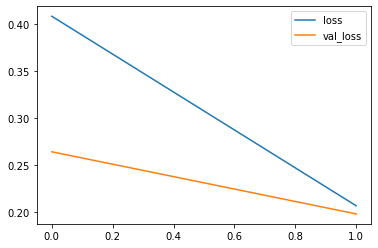

In [17]:
# Evaluating the model
# plotting the loss and validation loss of the model
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

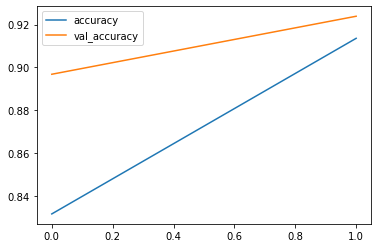

In [18]:
# plotting the accuracy and validation accuracy of the model
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [19]:
import pickle
f = open('tokdep','wb')
pickle.dump(tokenizer,f)
f.close()

In [20]:
#Prediction
text=["I wanna cry all the time"]
def predict_sentiment(text):
  # preprocessing the given text 
  text_seq = tokenizer.texts_to_sequences(text)
  text_pad = pad_sequences(text_seq, maxlen=T)

  # predicting the class
  predicted_sentiment = model.predict(text_pad)
  print(predicted_sentiment)
  predicted_sentiment = model.predict(text_pad).round()
  print(text_seq)
  print(text_pad)

  if predicted_sentiment == 1.0:
    return(print('You may have depression'))
  else:
    return(print('You probably do not have depresion'))
predict_sentiment(text)

[[0.8391731]]
[[18, 863, 199, 39, 11, 160]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [21]:
# saving the model for future purpose
model.save('depmod')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: depmod\assets


In [22]:
T

337